In [1]:
from IPython.display import display, Markdown

# Display as a heading
display(Markdown("# A Harikrishnan 22UCC025"))


# A Harikrishnan 22UCC025

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from IPython.display import display, Markdown


display(Markdown("# Importing the Csv file"))

# Importing the Csv file

In [4]:

df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Harikrishnan(New Project)\Ds\heart.csv")


print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160

In [5]:
from IPython.display import display, Markdown


display(Markdown("# Graphical Diagram"))

# Graphical Diagram

C:\Users\user\AppData\Local\Temp\ipykernel_18992\2488347291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["HeartDisease"], palette="coolwarm")


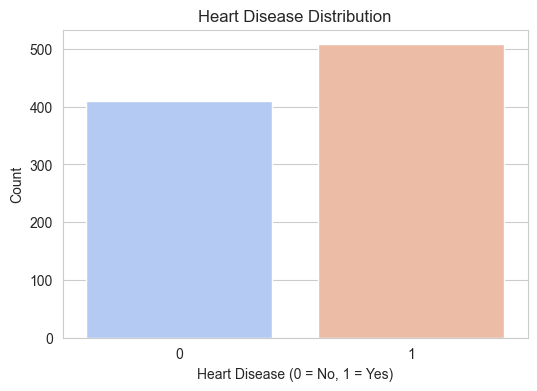

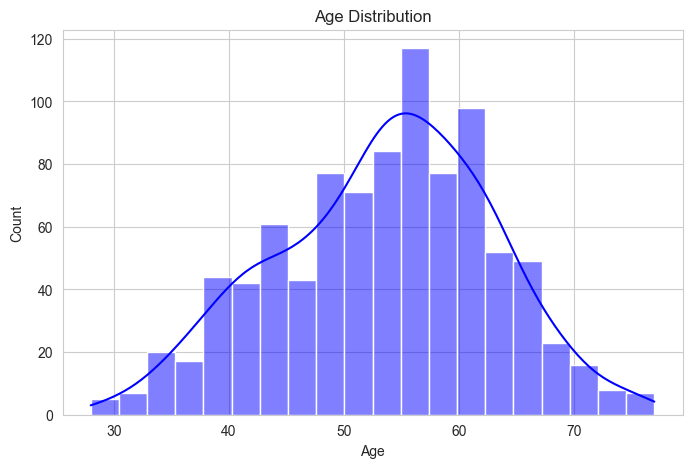

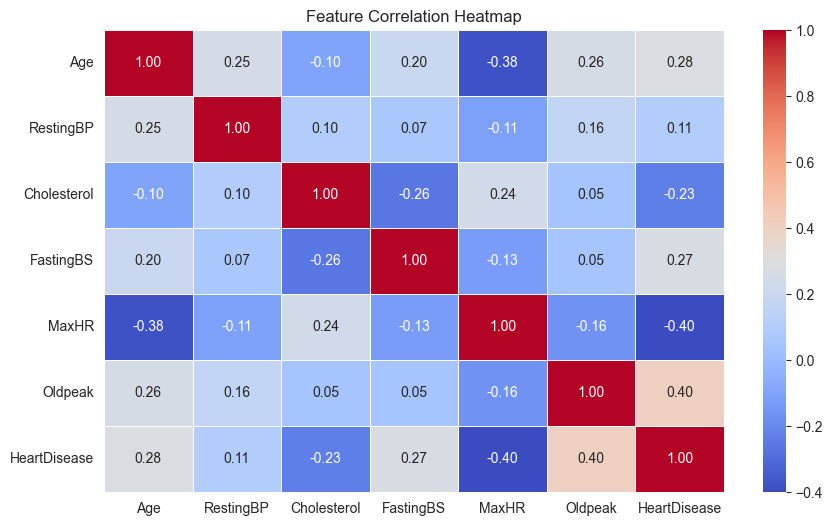

In [6]:

sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x=df["HeartDisease"], palette="coolwarm")
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

In [8]:

X = df_encoded.drop(columns=["HeartDisease"])
y = df_encoded["HeartDisease"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
from IPython.display import display, Markdown


display(Markdown("# Model Accuracy"))

# Model Accuracy

In [11]:

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 88.04%


In [12]:

def predict_heart_disease(user_input):
    user_df = pd.DataFrame([user_input], columns=X.columns)
    user_df_scaled = scaler.transform(user_df)
    prediction = model.predict(user_df_scaled)
    return "Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease"

In [13]:
from IPython.display import display, Markdown

display(Markdown("# Prediction"))

# Prediction

In [14]:

user_input = [50, 1, 2, 140, 200, 0, 1, 150, 1, 1.2, 2] 
print(predict_heart_disease(user_input))

No Heart Disease
